In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn, optim
import torch.nn.functional as F
import tqdm
from tqdm import tnrange

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

### The Data :

In [2]:
df2 = pd.read_excel("C:/Users/admin/Desktop/School/CSCI323/GRP_PROJ/Wine_Data/winequality-red1.xlsx")
df2.head()


,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df = pd.read_csv('C:/Users/admin/Desktop/School/CSCI323/GRP_PROJ/Wine_Data/winequality-red.csv')
df.head()

In [ ]:
df = pd.read_csv('C:/Users/admin/Desktop/School/CSCI323/GRP_PROJ/Wine_Data/winequality-white.csv')
df.head()

### Seperate the columns:

In [ ]:
split_data = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";")

data = split_data.to_list()

names = ["Fixed_acidity", "Volatile_acidity", "Citric_acid", "Residual_sugar", "Chlorides", "Free_sulfur_dioxide", "Total_sulfur_Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality"]

df2 = pd.DataFrame(data, columns=names)
df2.head()

In [ ]:
filename = 'output.xlsx'

# Export the DataFrame to an Excel file
df2.to_excel(filename, index=False)

### Check for null values:

<Axes: >

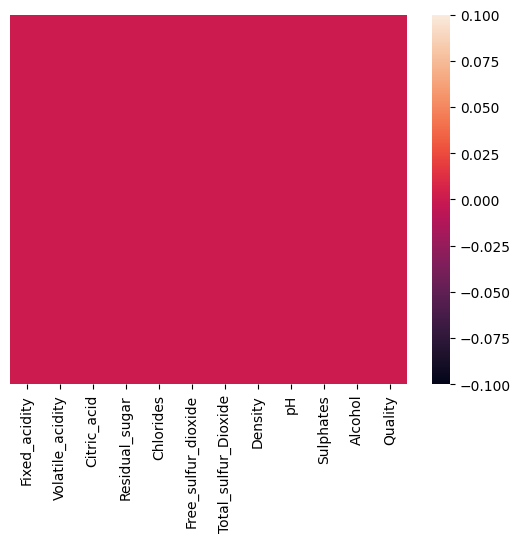

In [3]:
sn.heatmap(df2.isnull(), yticklabels=False)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed_acidity         1879 non-null   float64
 1   Volatile_acidity      1879 non-null   float64
 2   Citric_acid           1879 non-null   float64
 3   Residual_sugar        1879 non-null   float64
 4   Chlorides             1879 non-null   float64
 5   Free_sulfur_dioxide   1879 non-null   float64
 6   Total_sulfur_Dioxide  1879 non-null   float64
 7   Density               1879 non-null   float64
 8   pH                    1879 non-null   float64
 9   Sulphates             1879 non-null   float64
 10  Alcohol               1879 non-null   float64
 11  Quality               1879 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 176.3 KB


### Convert all values into float:

In [5]:
df3 = df2.astype(float)

### Plot Correlation Matrix :

In [ ]:
sn.heatmap(df3.corr(), cmap=sn.diverging_palette(220, 10, as_cmap=True))
plt.show()

### A Few More Plots :

In [ ]:
def plot_against_attr(attribute):
    #attribute="Density"
    x = list(df3[attribute])
    y = list(df3['Quality'])
    y, x = zip(*sorted(zip(y, x)))
    plt.plot(x,y,'o')
    plt.xlabel(attribute)
    plt.xticks()
    plt.ylabel('Quality')
    plt.grid()

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.show()
    
plot_against_attr("Density")
plot_against_attr("Citric_acid")
plot_against_attr("Alcohol")

In [ ]:
df3.hist(figsize=(18,10))

C:\Users\admin\AppData\Local\Temp\ipykernel_11768\3377143343.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df3[columns[k]], ax=ax1[i][j], color=color[k % len(color)])
C:\Users\admin\AppData\Local\Temp\ipykernel_11768\3377143343.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df3[column

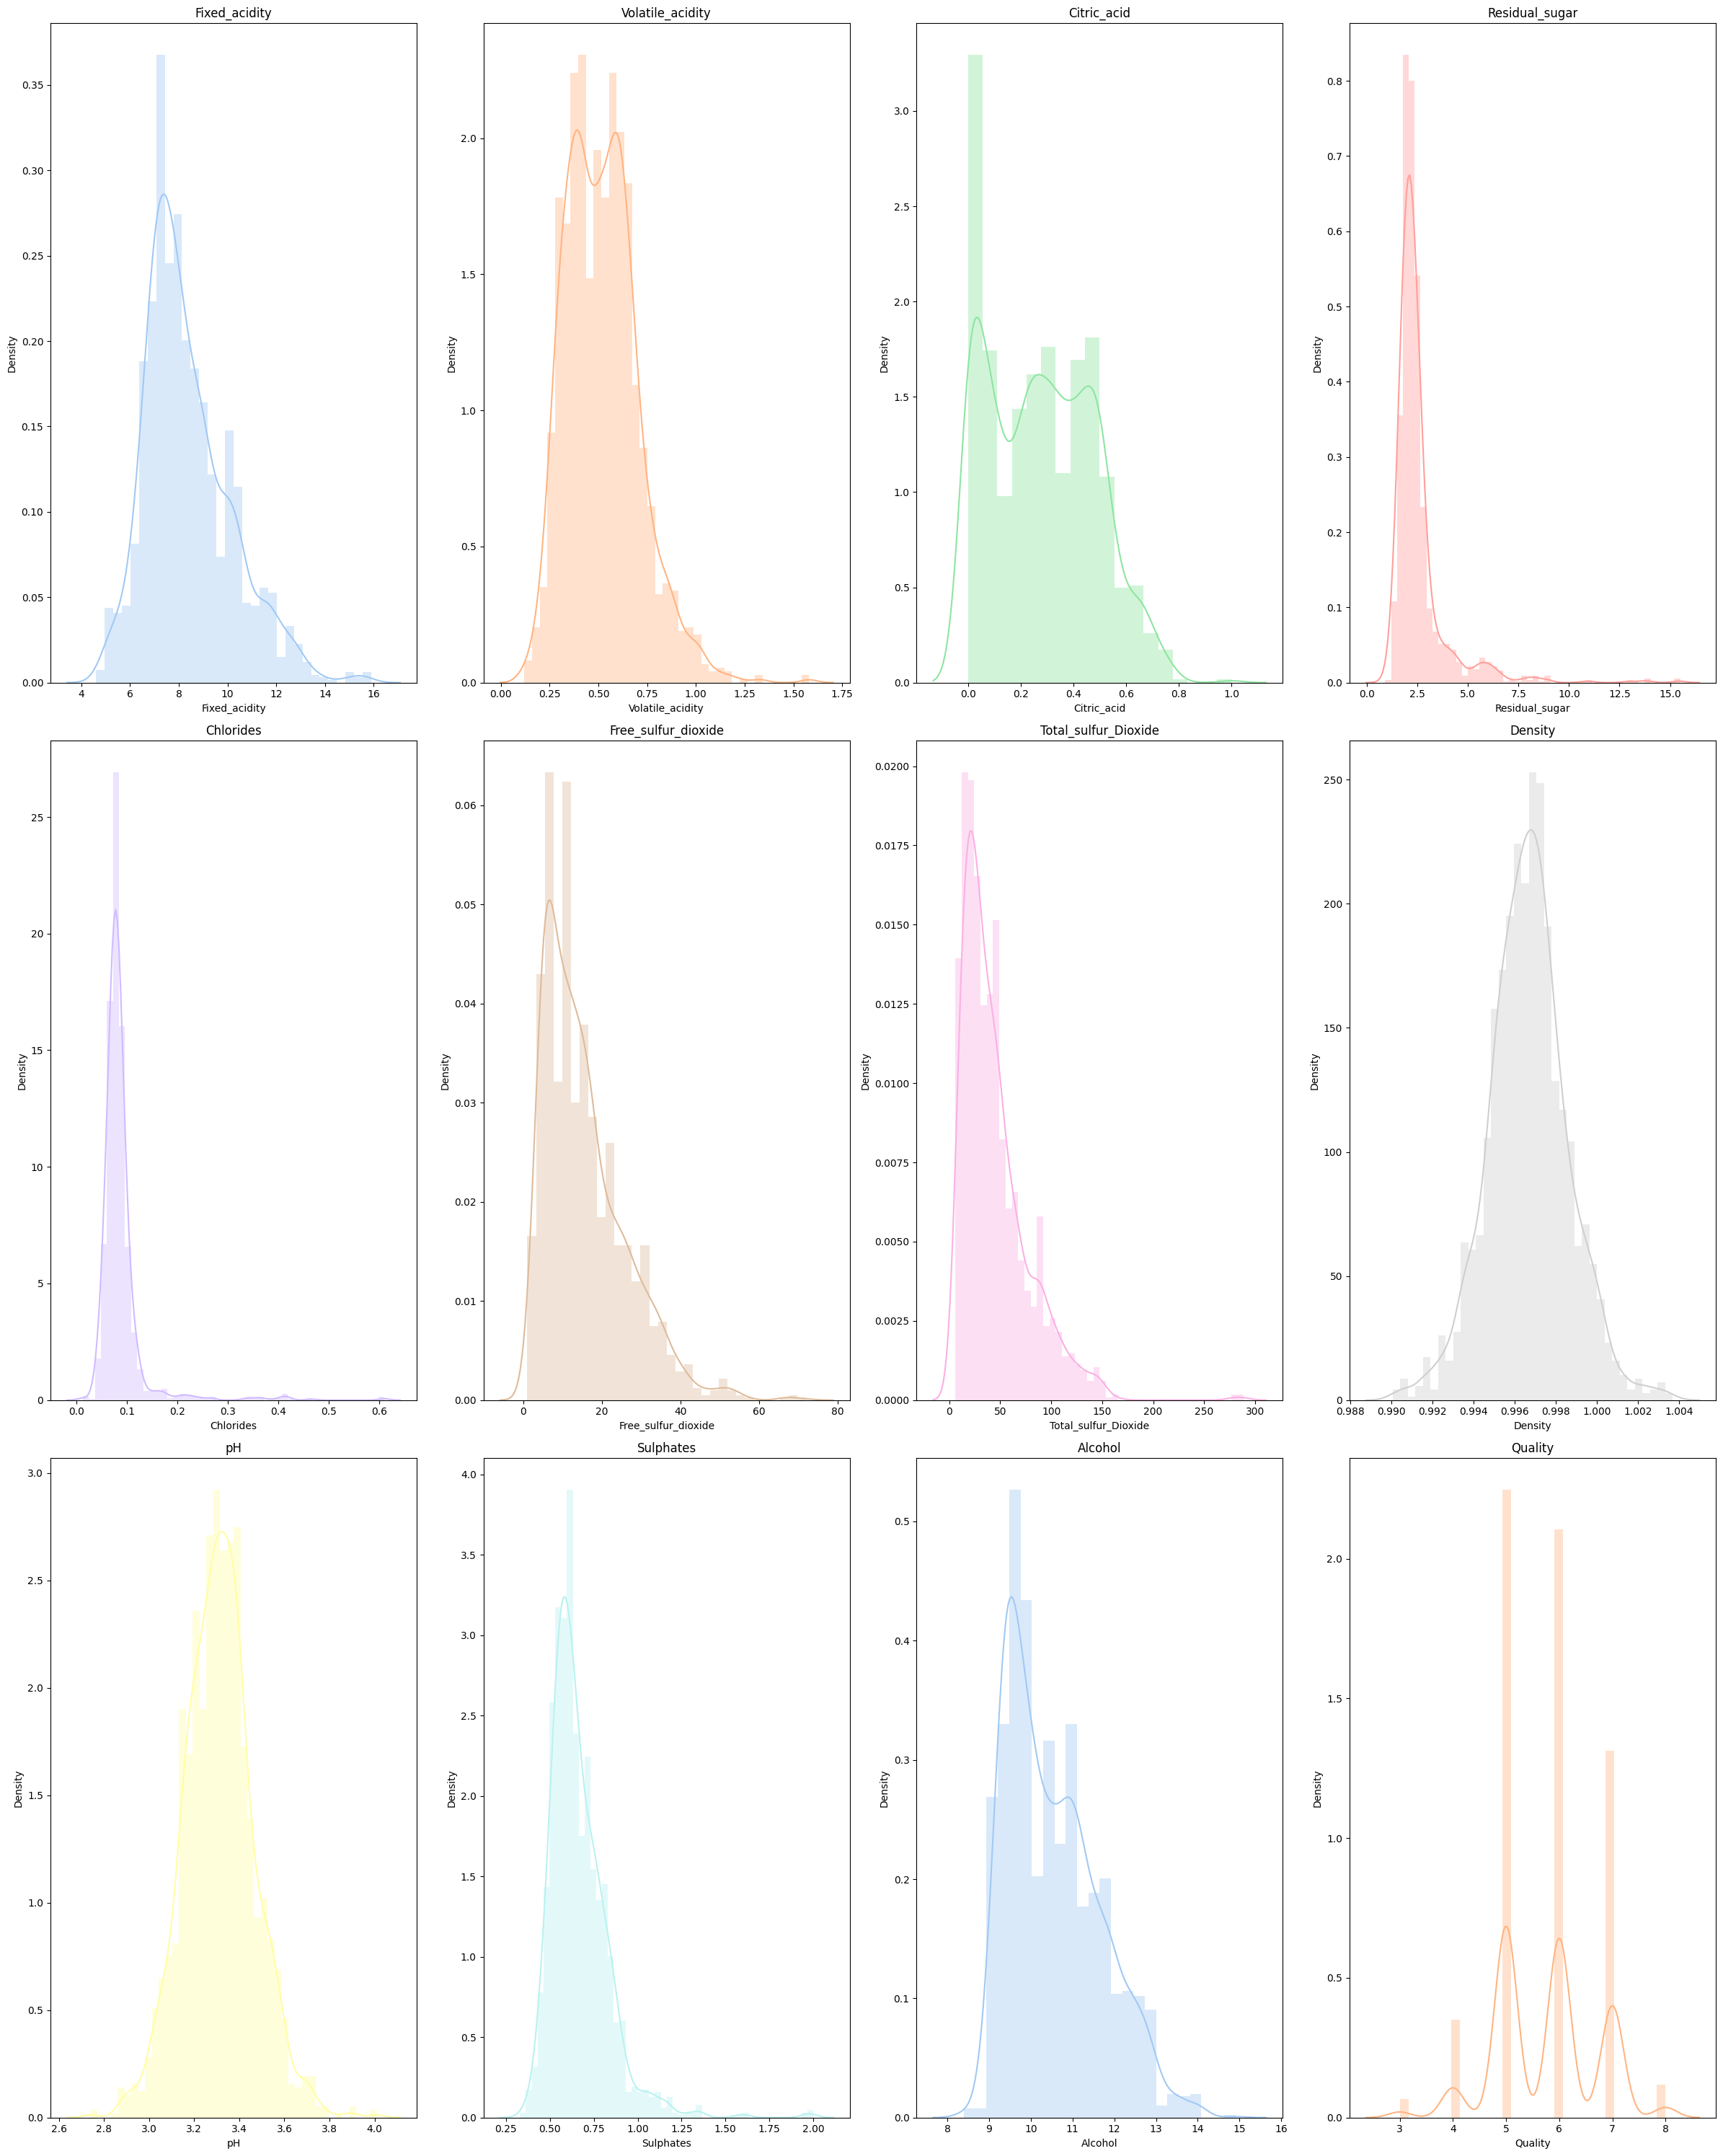

In [6]:
color = sn.color_palette("pastel")

fig, ax1 = plt.subplots(3, 4, figsize=(24, 30))

k = 0
columns = list(df3.columns)

for i in range(3):  # 5 rows
    for j in range(4):  # 4 columns
        if k < len(columns):
            sn.distplot(df3[columns[k]], ax=ax1[i][j], color=color[k % len(color)])
            ax1[i][j].set_title(columns[k])
            k += 1

plt.tight_layout()
plt.show()

In [7]:
def log_transform(col):
    return np.log(col[0])

df3['Residual_sugar'] = df3[['Residual_sugar']].apply(log_transform, axis=1)
df3['Chlorides'] = df3[['Chlorides']].apply(log_transform, axis=1)
df3['Free_sulfur_dioxide'] = df3[['Free_sulfur_dioxide']].apply(log_transform, axis=1)
df3['Total_sulfur_Dioxide'] = df3[['Total_sulfur_Dioxide']].apply(log_transform, axis=1)
df3['Sulphates'] = df3[['Sulphates']].apply(log_transform, axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_11768\917455013.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log(col[0])
C:\Users\admin\AppData\Local\Temp\ipykernel_11768\917455013.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log(col[0])
C:\Users\admin\AppData\Local\Temp\ipykernel_11768\917455013.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log(col[0])
C:\Users\admin\AppData\Local\Temp\

C:\Users\admin\AppData\Local\Temp\ipykernel_11768\3377143343.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df3[columns[k]], ax=ax1[i][j], color=color[k % len(color)])
C:\Users\admin\AppData\Local\Temp\ipykernel_11768\3377143343.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df3[column

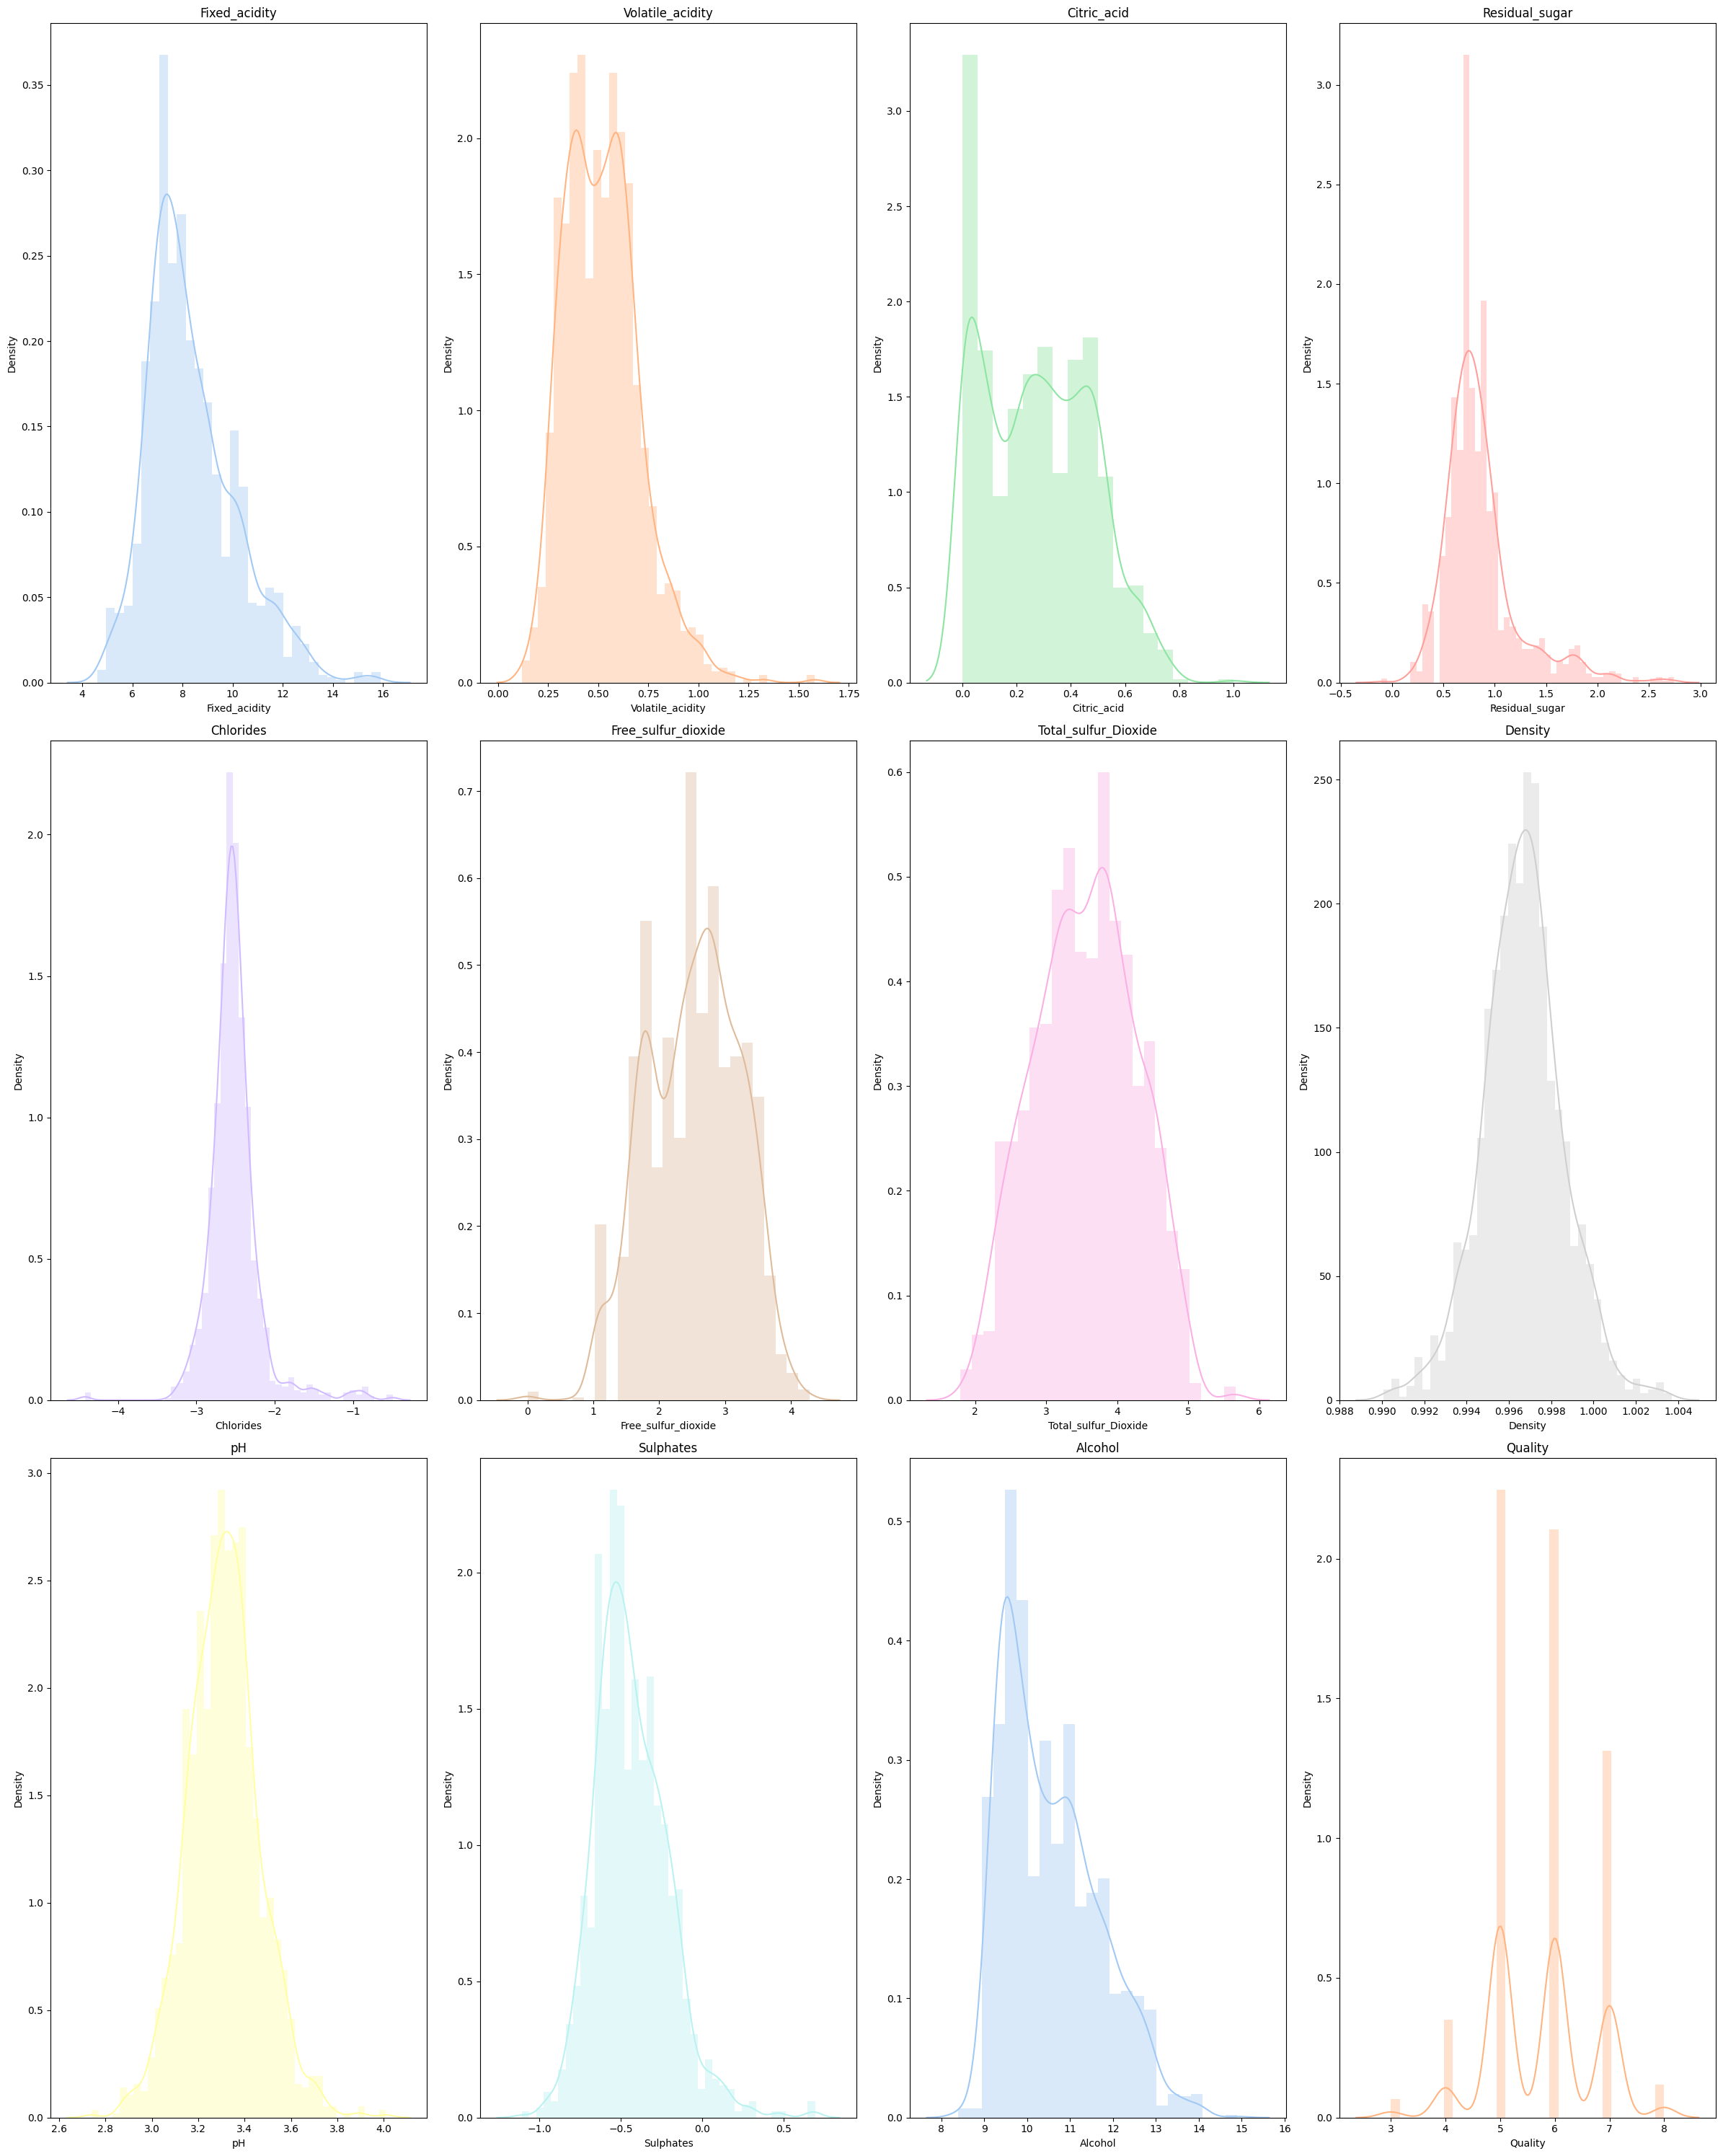

In [8]:
color = sn.color_palette("pastel")

fig, ax1 = plt.subplots(3, 4, figsize=(24, 30))

k = 0
columns = list(df3.columns)

for i in range(3):  # 5 rows
    for j in range(4):  # 4 columns
        if k < len(columns):
            sn.distplot(df3[columns[k]], ax=ax1[i][j], color=color[k % len(color)])
            ax1[i][j].set_title(columns[k])
            k += 1

plt.tight_layout()
plt.show()

### Scale all values :

In [ ]:
# Plot histograms for each feature
df3.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Log-Transformed Features')
plt.show()

In [9]:
quality_backup = df3["Quality"]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df3), columns = df3.columns)
df_scaled['Quality'] = quality_backup #restore quality values

In [ ]:
df_scaled.hist(figsize=(18,10))

In [ ]:
df_scaled.columns

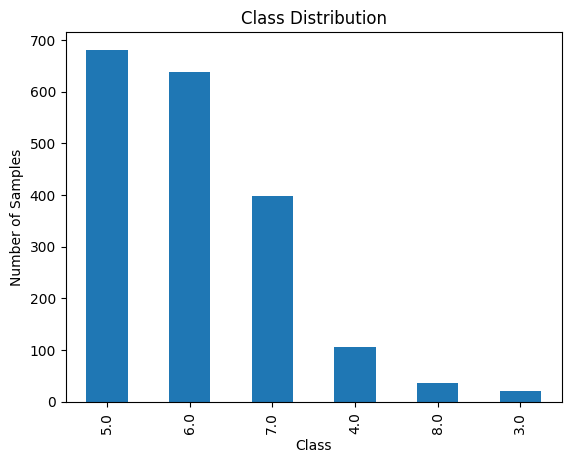

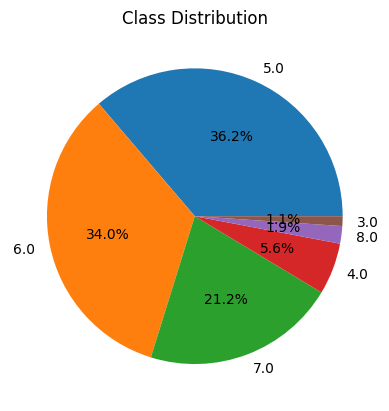

In [10]:
class_distribution = df_scaled['Quality'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()
class_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Class Distribution')
plt.show()

In [11]:
duplicates = df_scaled[df_scaled.duplicated()]


if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

df_scaled = df_scaled.drop_duplicates()


Found 502 duplicate rows:
      Fixed_acidity  Volatile_acidity  Citric_acid  Residual_sugar  Chlorides  \
4          0.247788          0.397260         0.00        0.262530   0.469653   
11         0.256637          0.260274         0.36        0.672352   0.452338   
27         0.292035          0.212329         0.21        0.202152   0.554307   
40         0.238938          0.226027         0.36        0.660640   0.462868   
65         0.230088          0.414384         0.05        0.576989   0.501106   
...             ...               ...          ...             ...        ...   
1874       0.035398          0.205479         0.24        0.280552   0.409506   
1875       0.504425          0.136986         0.45        0.689220   0.459406   
1876       0.283186          0.308219         0.09        0.329657   0.429872   
1877       0.247788          0.164384         0.30        0.243534   0.462868   
1878       0.707965          0.130137         0.72        0.314039   0.455896   

 

In [12]:
target_counts = df_scaled['Quality'].value_counts()

print(target_counts)

Quality
5.0    577
6.0    535
7.0    178
4.0     56
8.0     18
3.0     13
Name: count, dtype: int64


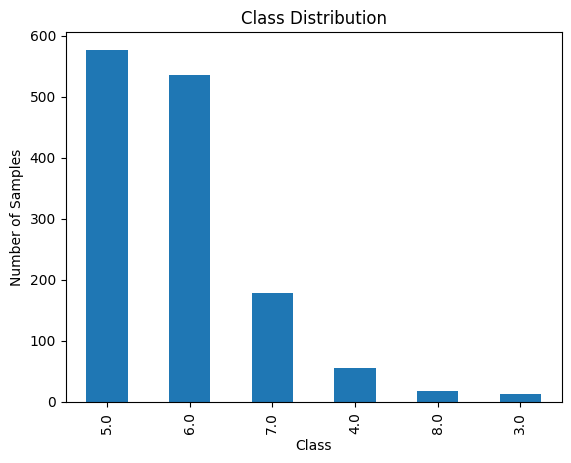

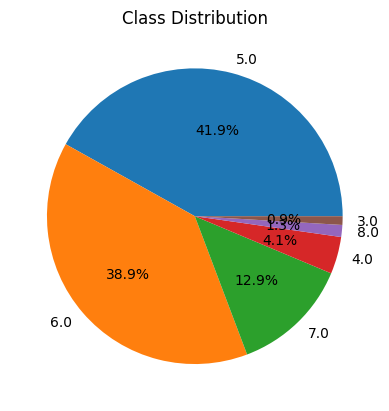

In [13]:
class_distribution = df_scaled['Quality'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()
class_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Class Distribution')
plt.show()

### Balance Data :

In [14]:
X = df_scaled.drop('Quality', axis=1)
y = df_scaled['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("Original class distribution:")
print(y_train.value_counts())

print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

Original class distribution:
Quality
5.0    465
6.0    425
7.0    141
4.0     44
8.0     16
3.0     10
Name: count, dtype: int64

Resampled class distribution:
Quality
6.0    465
5.0    465
7.0    465
4.0    465
3.0    465
8.0    465
Name: count, dtype: int64


In [15]:
df_scaled_balanced = pd.DataFrame(X_train_resampled, columns=X.columns)
df_scaled_balanced['Quality'] = y_train_resampled

In [16]:
display(df_scaled_balanced)

,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,0.460177,0.089041,0.490000,0.385993,0.506955,0.633215,0.439973,0.596916,0.535433,0.556830,0.246154,6.0
1,0.769912,0.212329,0.580000,0.262530,0.448729,0.633215,0.489621,0.758443,0.251969,0.219398,0.092308,5.0
2,0.380531,0.191781,0.320000,0.642304,0.504047,0.538407,0.531243,0.662996,0.503937,0.470248,0.323077,7.0
3,0.522124,0.082192,0.470000,0.297694,0.433757,0.418962,0.357784,0.567548,0.322835,0.556830,0.400000,7.0
4,0.230088,0.260274,0.180000,0.297694,0.452338,0.581038,0.423837,0.553598,0.614173,0.432986,0.184615,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2785,0.161959,0.332977,0.184898,0.220255,0.365178,0.608110,0.544471,0.259450,0.510853,0.483285,0.564594,8.0
2786,0.309277,0.175581,0.381745,0.243534,0.458564,0.577681,0.315013,0.315400,0.384046,0.414087,0.530707,8.0
2787,0.262000,0.256294,0.177781,0.310064,0.414742,0.748212,0.474775,0.317140,0.494669,0.454098,0.575599,8.0
2788,0.272040,0.305219,0.086714,0.324941,0.424436,0.822072,0.529337,0.287478,0.568654,0.451312,0.672491,8.0


### Shuffle Data :

In [17]:
df_scaled3=df_scaled_balanced.sample(frac=1)

In [18]:
total_rows = df_scaled3.shape[0]
print("Total number of rows:", total_rows)

Total number of rows: 2790


### Split into train, test and val set :

In [19]:
train = df_scaled3.iloc[:1563]
val = df_scaled3.iloc[1563:1953]
test = df_scaled3.iloc[1953:]

### Class distribution in the train-set :

In [20]:
train["Quality"].value_counts()

Quality
5.0    270
7.0    266
8.0    266
3.0    259
4.0    253
6.0    249
Name: count, dtype: int64

### Split features and labels :

In [21]:
X_train, y_train= train.drop('Quality', axis=1), train['Quality']
print(X_train.shape)

X_val, y_val = val.drop('Quality', axis=1), val['Quality']
print(X_val.shape)

X_test, y_test = test.drop("Quality", axis=1), test["Quality"]

(1563, 11)
(390, 11)


### Split into batches :

In [22]:
f=15 # no. of batches

train_batch = np.array_split(X_train, f) 
label_batch = np.array_split(y_train, f) # 50 sections/batches

val_batch = np.array_split(X_val, f)
val_label_batch = np.array_split(y_val, f)

test_batch = np.array_split(X_test,f) 
test_label_batch  = np.array_split(y_test, f)


for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()
for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)
    
for i in range(len(val_batch)):
    val_batch[i] = torch.from_numpy(val_batch[i].values).float()
for i in range(len(val_label_batch)):
    val_label_batch[i] = torch.from_numpy(val_label_batch[i].values).float().view(-1, 1)
    
    
for i in range(len(test_batch)):
    test_batch[i] = torch.from_numpy(test_batch[i].values).float()
for i in range(len(test_label_batch)):
    test_label_batch[i] = torch.from_numpy(test_label_batch[i].values).float().view(-1, 1)
    
print("Batch size:", len(train_batch[0]))


Batch size: 105


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


### The Model :

In [23]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(11, 22)
        self.fc2 = nn.Linear(22, 44)
        self.fc3 = nn.Linear(44, 88)
        self.fc4 = nn.Linear(88, 176)
        self.fc5 = nn.Linear(176, 88)
        self.fc6 = nn.Linear(88, 22)
        self.fc7 = nn.Linear(22, 1)
       
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))

        return x

model = Regressor()
train_losses, val_losses = [], []
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01) # 0.015 87
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1, patience=15) 
total_epochs=0

### The training loop :

In [24]:
#print(model)
epochs = 1000
total_epochs+=epochs

for e in tnrange(epochs):
    
    model.train()
    train_loss = 0
    val_loss_1=0
    val_loss_sum = 0
    
    for i in range(len(train_batch)):
        
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = criterion(output, label_batch[i])
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
        with torch.no_grad():
            
            for j in range(len(val_batch)):
                
                val_output = model(val_batch[j])
                val_loss =  criterion(val_output, val_label_batch[j])
                val_loss_1+=val_loss.item()
        val_loss_sum=val_loss_1/len(val_batch)
        
        
    print("Epoch :", e, "train_loss :", train_loss/len(train_batch), "Val loss: ", val_loss_sum/len(val_batch))    
    val_losses.append(val_loss_sum/len(val_batch))    
    train_losses.append(train_loss/len(train_batch))   

C:\Users\admin\AppData\Local\Temp\ipykernel_11768\3358014383.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for e in tnrange(epochs):


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch : 0 train_loss : 18.8781751314799 Val loss:  17.924532663557265
Epoch : 1 train_loss : 7.7038506984710695 Val loss:  6.800595795313517
Epoch : 2 train_loss : 3.2477783997853598 Val loss:  3.151892385482788
Epoch : 3 train_loss : 2.1915576299031576 Val loss:  2.13543588426378
Epoch : 4 train_loss : 1.4755080699920655 Val loss:  1.3857891580793593
Epoch : 5 train_loss : 1.0356104254722596 Val loss:  0.9560986725489298
Epoch : 6 train_loss : 0.9398816466331482 Val loss:  0.8710115271144443
Epoch : 7 train_loss : 0.9057162245114644 Val loss:  0.840534502002928
Epoch : 8 train_loss : 0.8814749042193095 Val loss:  0.8201010203361512
Epoch : 9 train_loss : 0.8681709249814351 Val loss:  0.8105745576487647
Epoch : 10 train_loss : 0.8459423899650573 Val loss:  0.7989997155136532
Epoch : 11 train_loss : 0.8294858853022258 Val loss:  0.789986840221617
Epoch : 12 train_loss : 0.8065958340962728 Val loss:  0.7763234392801921
Epoch : 13 train_loss : 0.783198614915212 Val loss:  0.76075655579566

### Training Metrics :

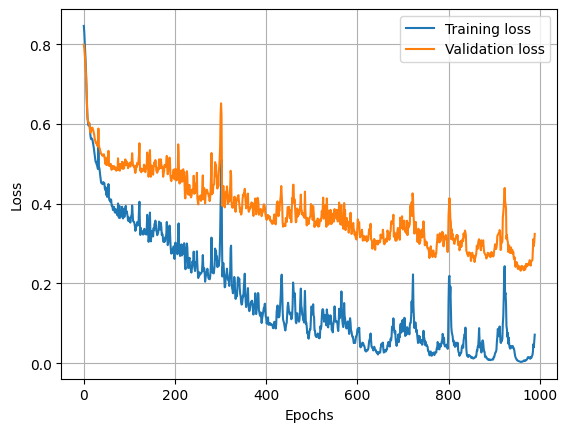

In [25]:
frm=10 # does not 
plt.plot(train_losses[frm:], label='Training loss')
plt.plot(val_losses[frm:], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

### Save and load the model :

In [ ]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/Wine_Quality/model_93.pt')


In [ ]:
model.load_state_dict(torch.load('/content/gdrive/My Drive/Wine_Quality/model_93.pt'))

### How does the model perform on the test-set?

In [26]:
correct=0
i=0
res=[]
with torch.no_grad():
    for batch in test_batch :
        for j in range(len(batch)):
            x = model(batch[j])
            #print(round(x.item()))
            res.append(round(x.item()))

true_labels= list(test["Quality"])

for i in range(len(res)):
    if res[i]==int(true_labels[i]):
        correct+=1
        
print("Accuracy:", 100*(correct/len(res)), "%")

Accuracy: 75.26881720430107 %
